# Empirical Process

An empirical process generated from $x_i \sim \mathrm{Uniform}(0,1)$

In [1]:
library(tibble)
library(ggplot2)


plot.em <- function(n, coll, Scal = TRUE){
  
  x <- sort( runif(n) )

  dd <- tibble(x0 = c(0, x),
               x1 = c(x, 1),
               ste = (0:n)/n,
               ) %>% 
    dplyr::mutate(yd0 = ste - x0, yd1 = ste - x1) %>%
    dplyr::mutate(ye0 = sqrt(n) * yd0, ye1 = sqrt(n)* yd1)
  
  p0 <- ggplot(dd)+theme_bw()

  p1 <- p0 + ylim(-0.2, 0.2) + 
             geom_segment(aes(x = x0, y = yd0, xend = x1, yend = yd1), color = coll)
  p2 <- p0 + ylim(-1, 1)+ 
             geom_segment(aes(x = x0, y = ye0, xend = x1, yend = ye1), color = coll)
  
  if (Scal == TRUE){
    return(p2)
  } else {
    return(p1)
  }
}


The average version

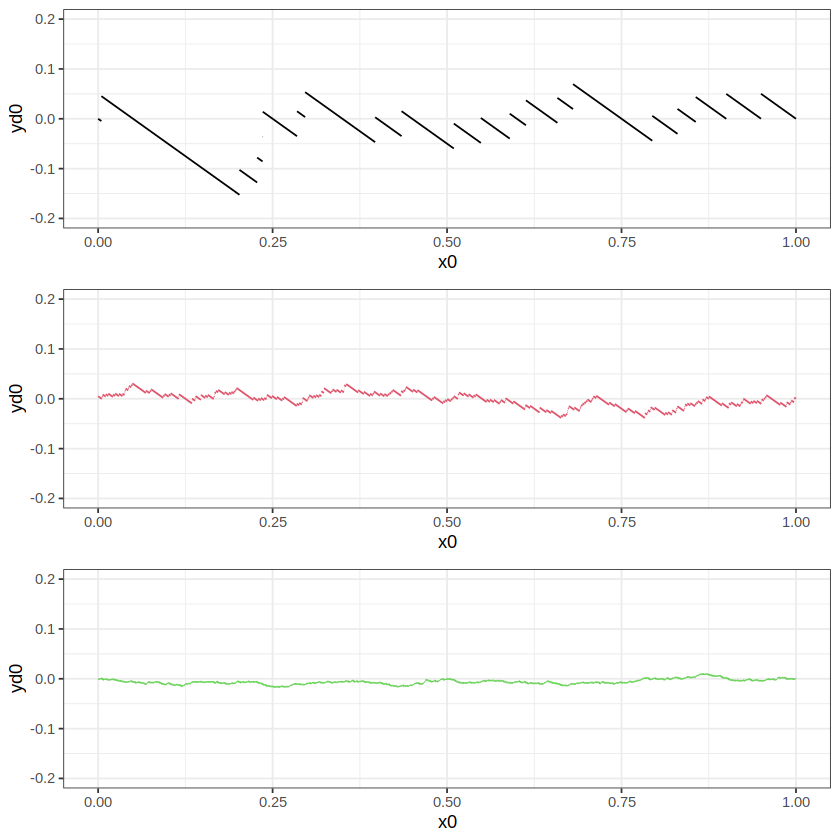

In [2]:
p1 <- plot.em(20, 1, FALSE)
p2 <- plot.em(200, 2, FALSE)
p3 <- plot.em(2000, 3, FALSE)

gridExtra::grid.arrange(p1, p2, p3)

The scaled version $\sqrt{n} (F_n(x) - F(x))$

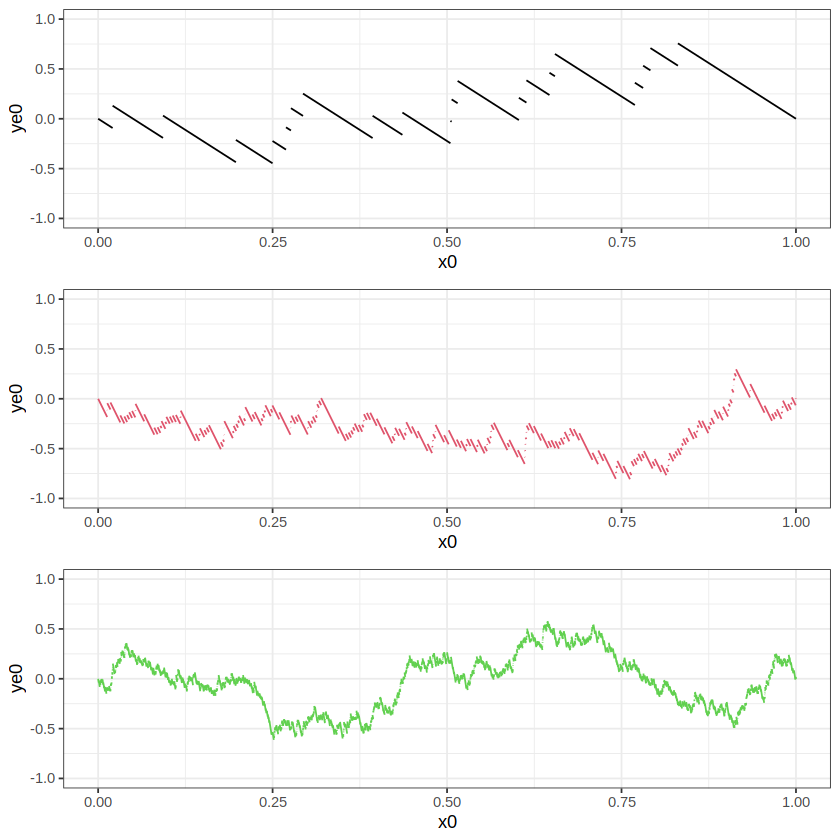

In [4]:

p1 <- plot.em(20, 1, TRUE)
p2 <- plot.em(200, 2, TRUE)
p3 <- plot.em(2000, 3, TRUE)

gridExtra::grid.arrange(p1, p2, p3)